# Problem Statement: 
* Recommend the steps to retain existing telecom customers. In the industry retaining customers is going challenging day by day and acquire new customers is even draining so retaining the existing customers is highly worths every effort than acquiring new customers.
* Know the customer behavior and recommend the steps to retain existing customers and build the model to know which existing customers may leave.
1. Recommend the steps to retain existing telecom customers.
2. Build customer churn, prediction model.

1. Imports
2. Info 
3. Customer Analysis
    1. Customer segmentation
    2. Steps to retain customers
    3. Hypothesis test (Permutations)
4. Machine Learning Model 
    1. Random Under-Sampling
    2. EDA
    3. Feature scaling
    4. Decision Tree | Confusion matrix, Classification Report
    5. Random Forest | Confusion matrix, Classification Report
    6. Gradient Boost | Confusion matrix, Classification Report
    7. KNN | Confusion matrix, Classification Report
5. Evaluation AUC ROC Curve for all models 
6. Conclusion


# Imports

In [ ]:
!pip install ptitprince

     |████████████████████████████████| 52 kB 309 kB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-py3-none-any.whl size=8427 sha256=f21f829e204ed399b4627b29dfbb89f8d979ae3c7cc169800b5a9cd03cb8e5da
  Stored in directory: /root/.cache/pip/wheels/58/a5/f2/55920bbc5d0e6fb74b2370e1e52e07c236ba7b621236ea5a81
Successfully built ptitprince


In [ ]:
# Customer Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince

# Machine Learning
## Feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
df = pd.read_csv('../input/telecom-churn/telecom_churn.csv')
df

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

# INFO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.describe()

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16.426032     2.535712   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.400000   114.000000      66.200000    11.770000   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000

# Customer Analysis

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

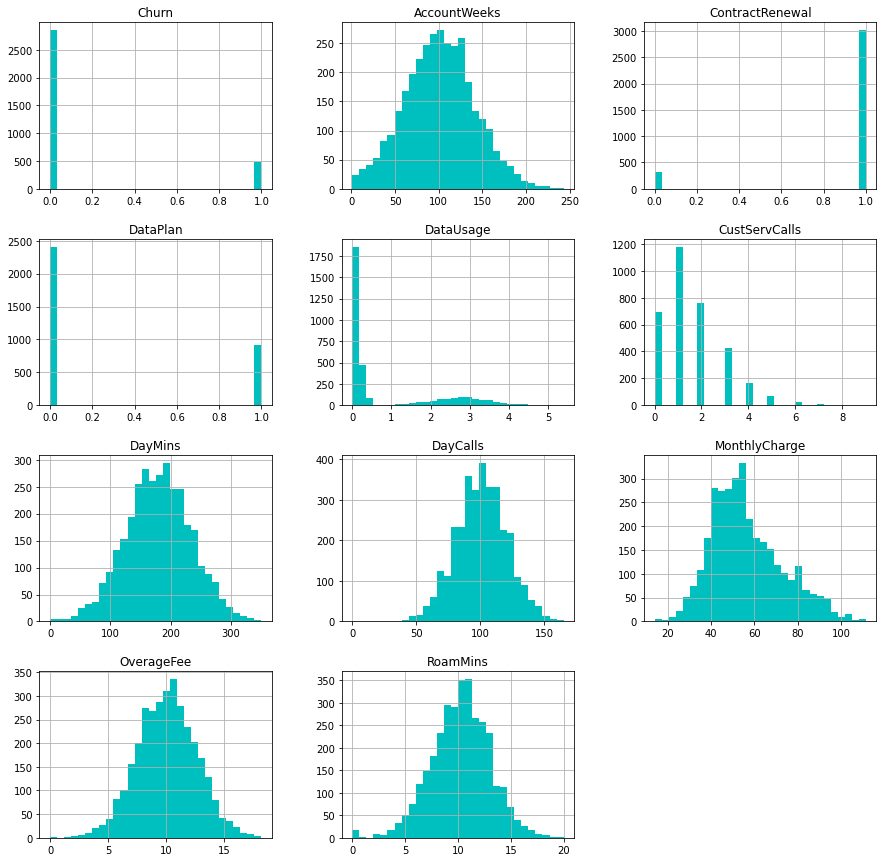

In [ ]:
df.hist(figsize=(15,15), bins=30, color='c')

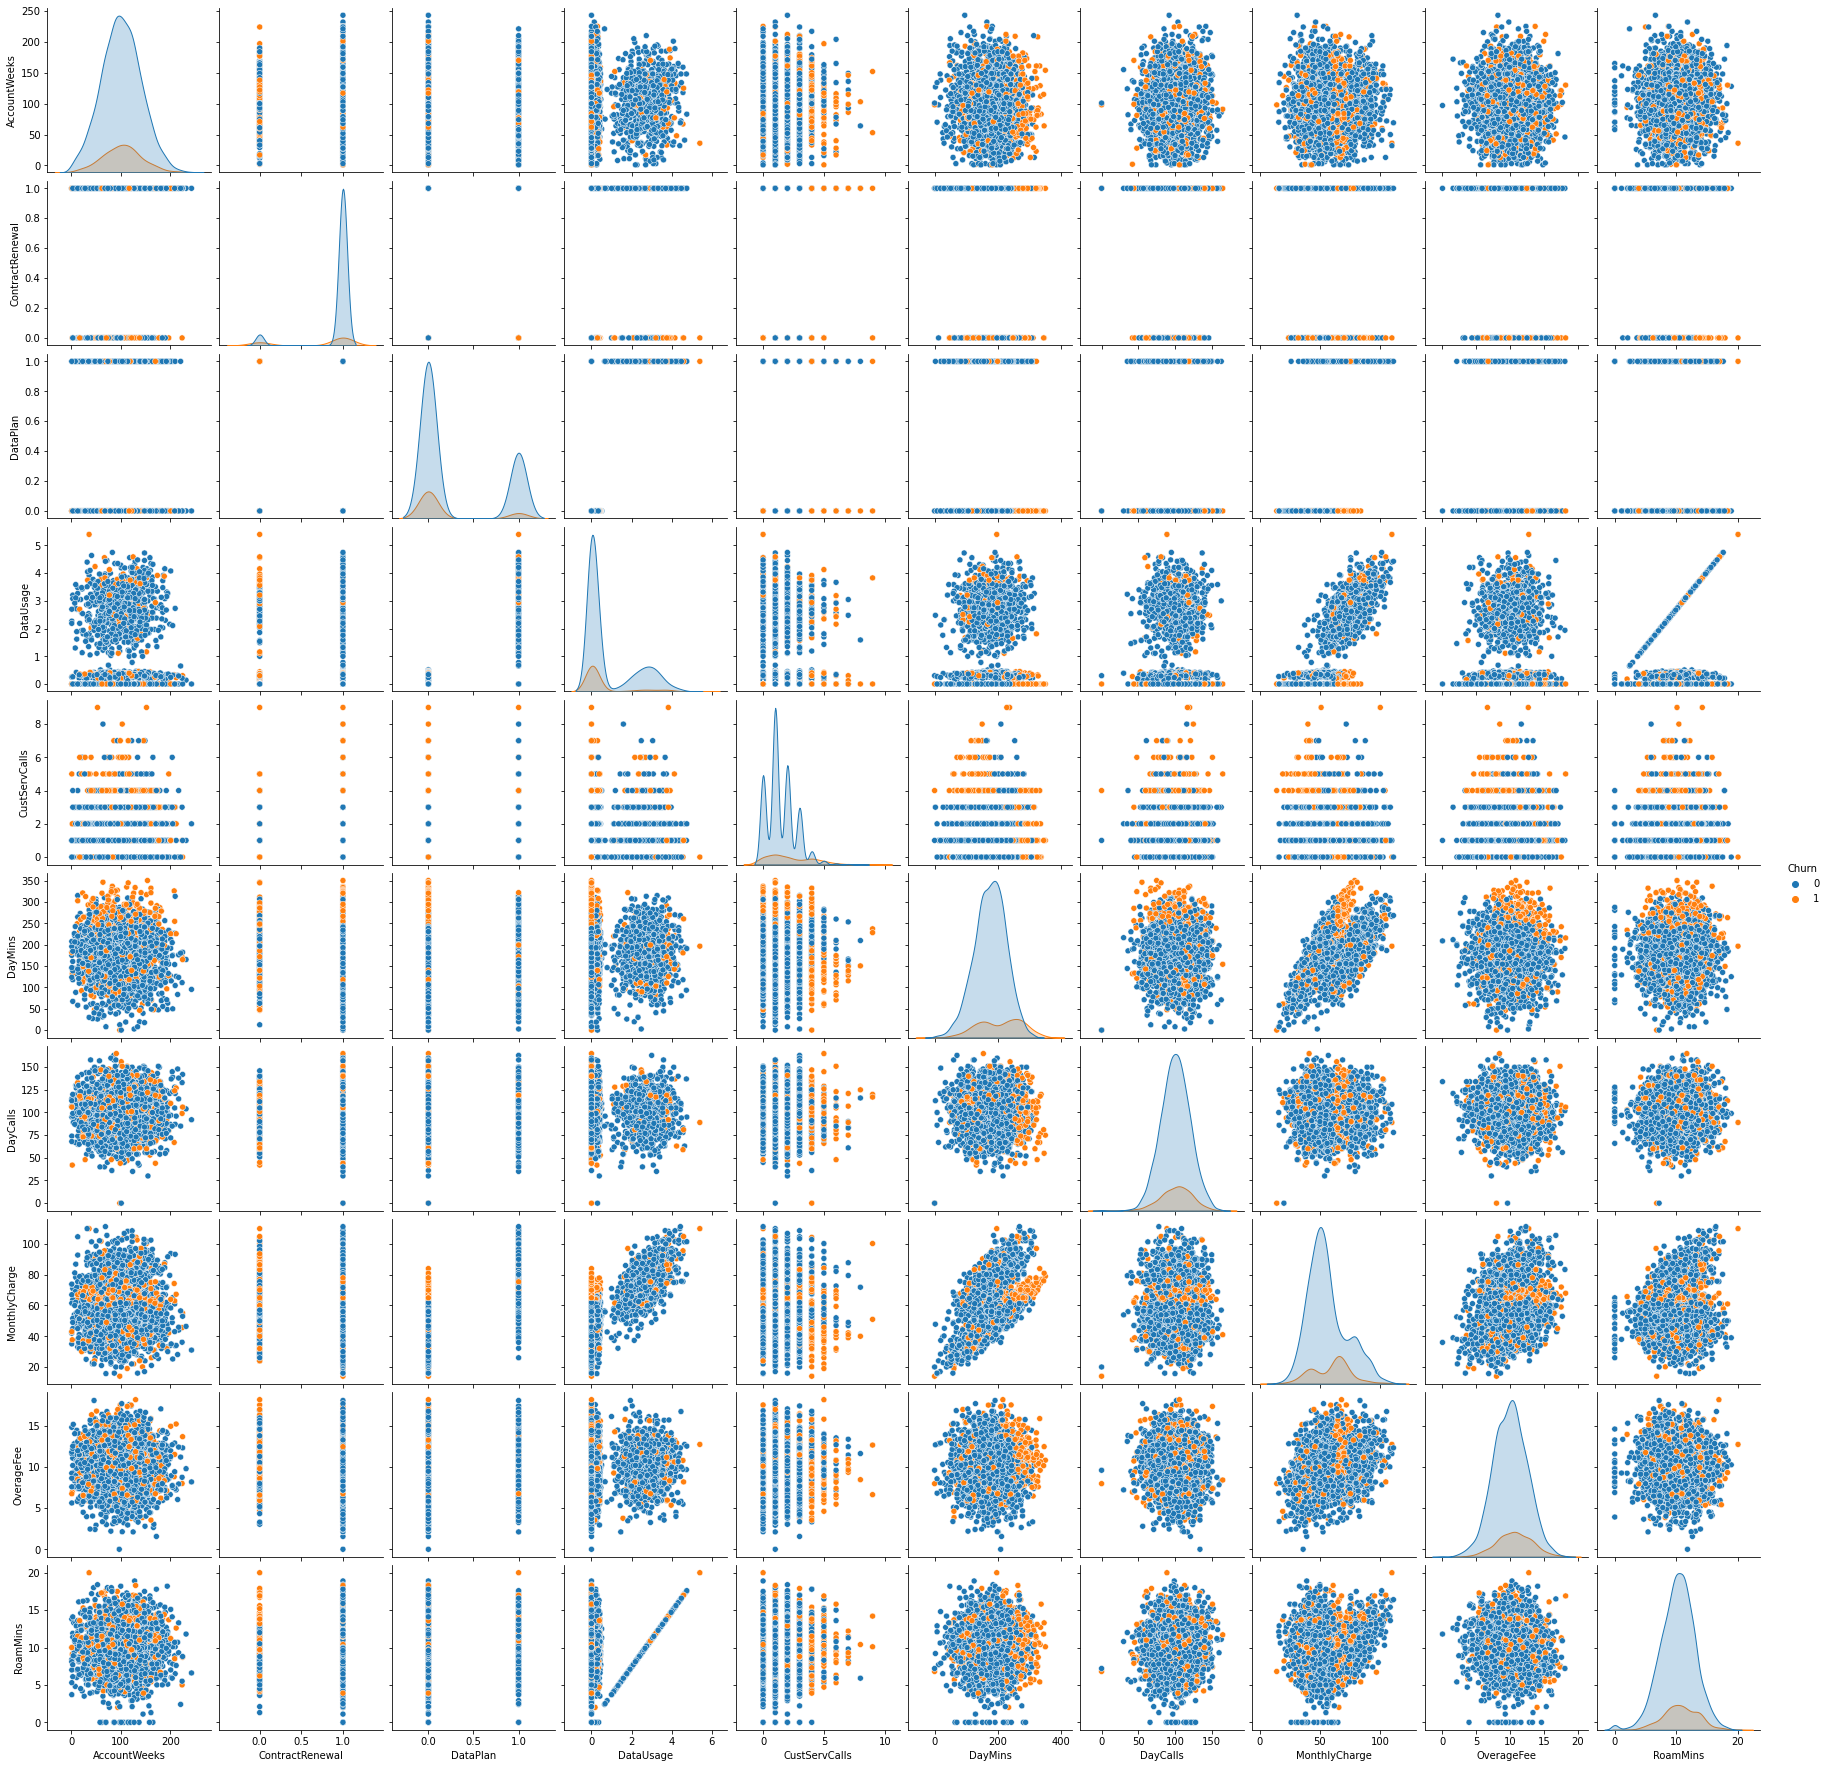

In [ ]:
sns.pairplot(df, hue="Churn")

<AxesSubplot:title={'center':'All Over Churned Ratio'}, ylabel='Churn'>

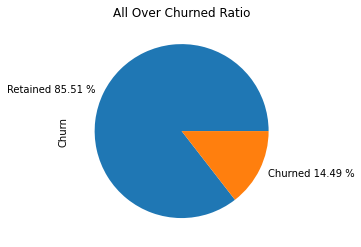

In [ ]:
df["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

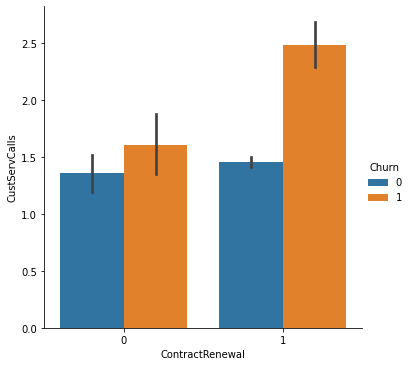

In [ ]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df)

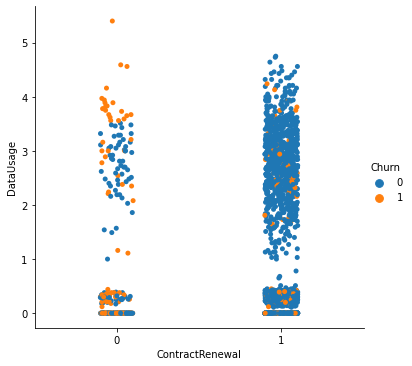

In [ ]:
sns.catplot(x="ContractRenewal", y="DataUsage", hue="Churn", data=df)

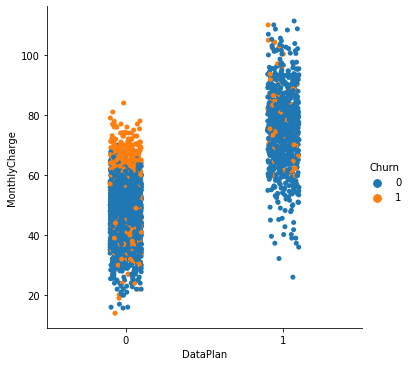

In [ ]:
sns.catplot(x="DataPlan", y="MonthlyCharge", hue="Churn", data=df)

In [ ]:
df1 = df.loc[df["Churn"]==1] # Churned Customers
df0 = df.loc[df["Churn"]==0] # Existing Customers

## 1. Daily Min vs Monthly Charge 

Text(0.5, 1.0, 'Churn=0&1')

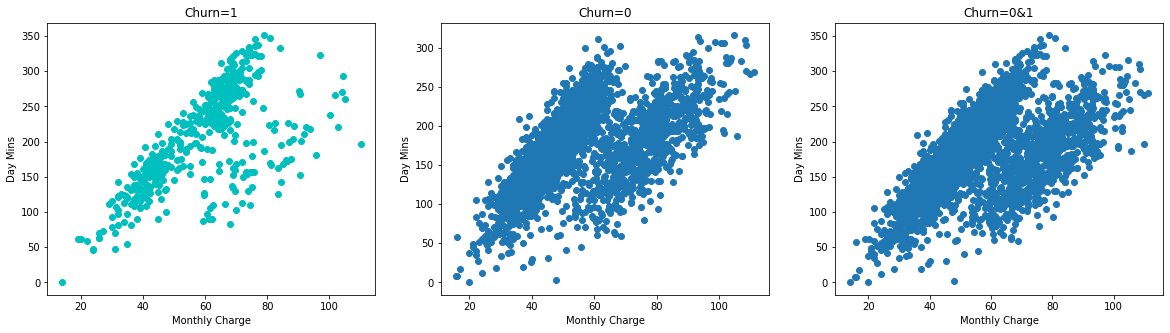

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

## 2. Data Usage vs Monthly Charge

Text(0.5, 1.0, 'Churn=0&1')

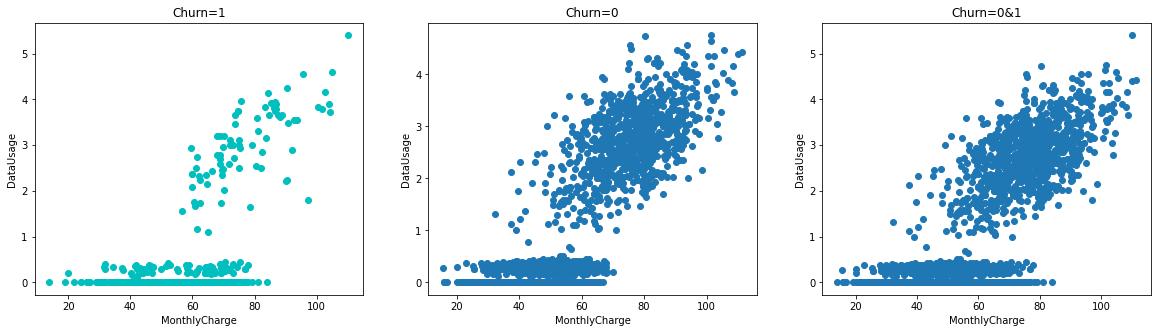

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

**In the data usage case also we can easily consider two segments.
Consider the segment as below,**
1. Customers whose data usage is 0-1.
2. Customers whose data usage is >1.

# Customer Segmentation

In [ ]:
# Manual Customer Segmentaion
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Custoemrs in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

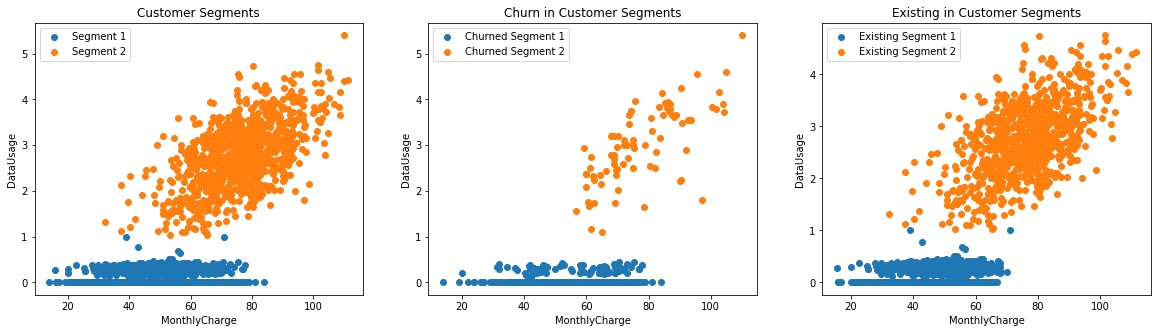

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DataUsage'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DataUsage'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DataUsage'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DataUsage'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DataUsage'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DataUsage'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

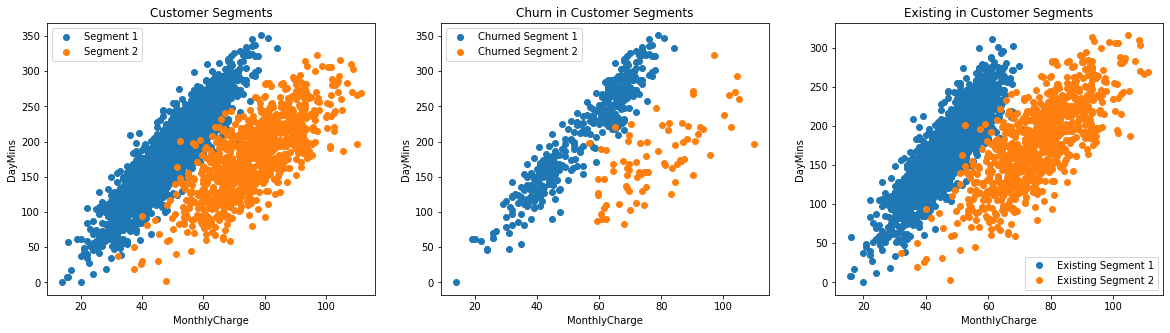

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DayMins'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DayMins'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DayMins'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DayMins'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DayMins'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DayMins'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

### Segment 1. Customers who's  usage is 0-1.

In [ ]:
seg1

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
5         0           118                0         0       0.00   
7         0           147                0         0       0.00   
...     ...           ...              ...       ...        ...   
3326      0            96                1         0       0.36   
3327      0            79                1         0       0.00   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
5                 0    223.4        98           57.0       11.03       6.3  
7                 0    157.0        79           36.0        5.16       7.1  
...             ...      ...       ...            ...         ...       ...  
3326              1    106.6       128           46.6       14.24      14.9  
3327              2    134.7        98           40.0        9.49      11.8  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  

[2420 rows x 11 columns]

In [ ]:
# % of customer churn in seg1 
seg1["Churn"].value_counts(normalize=True) * 100

0    83.347107
1    16.652893
Name: Churn, dtype: float64

In [ ]:
# % of customer having data plan in seg1 
(seg1["DataPlan"].value_counts(normalize=True) * 100)

0    99.628099
1     0.371901
Name: DataPlan, dtype: float64

In [ ]:
# list of customer having data plan in seg1, 9 customers
seg1.loc[seg1["DataPlan"]==1]

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
343       0            98                1         1       0.00   
383       0           117                0         1       1.00   
595       0            87                1         1       0.00   
2906      0            87                1         1       0.00   
3022      0           123                1         1       0.78   
3212      0           144                1         1       1.00   
3216      0           221                1         1       0.65   
3234      0            75                1         1       0.68   
3275      0           120                1         1       0.00   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
343               2     64.6        98           26.0        8.81       0.0  
383               1    196.0        82           71.0       16.14       3.7  
595               1    151.4        95           39.0        7.62       0.0  
2906              1    165.8       122           45.0        9.35       0.0  
3022              0    146.6        87           42.8        5.74       2.9  
3212              0    105.0        86           39.0        6.09       3.7  
3216              0    180.5        85           56.5       11.21       2.4  
3234              1    200.6        96           55.8        8.21       2.5  
3275              1    128.5       115           36.0        8.19       0.0

Text(0.5, 1.0, 'Churn=0&1')

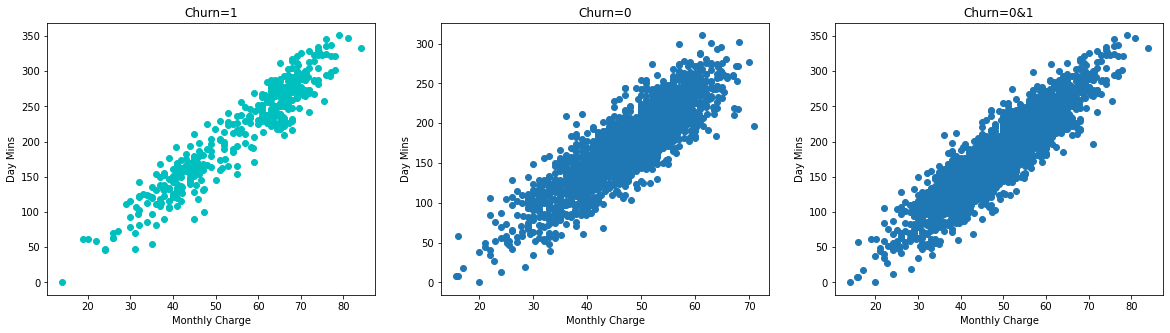

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

Text(0.5, 1.0, 'Churn=0&1')

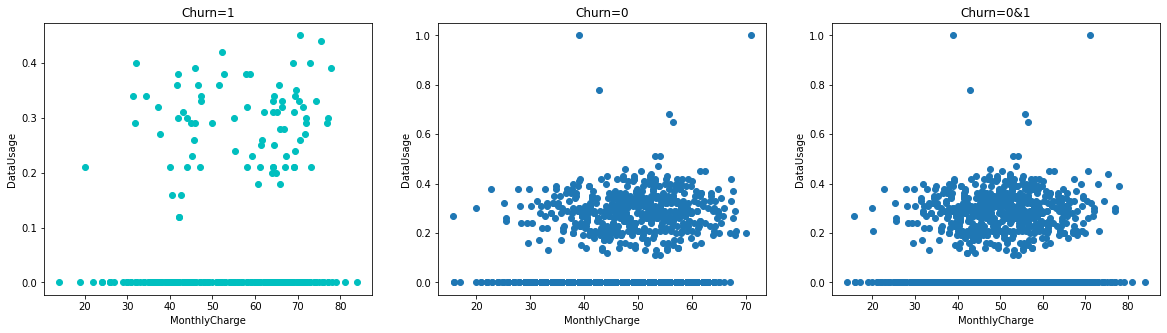

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

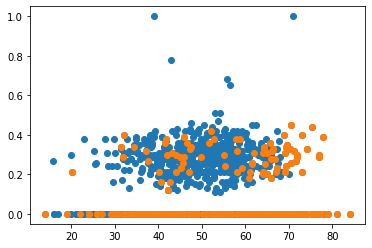

In [ ]:
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o") # All within seg1
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "o") # Churned within seg1

### More on zero data usage customers

Text(0.5, 1.0, 'Churn=0&1')

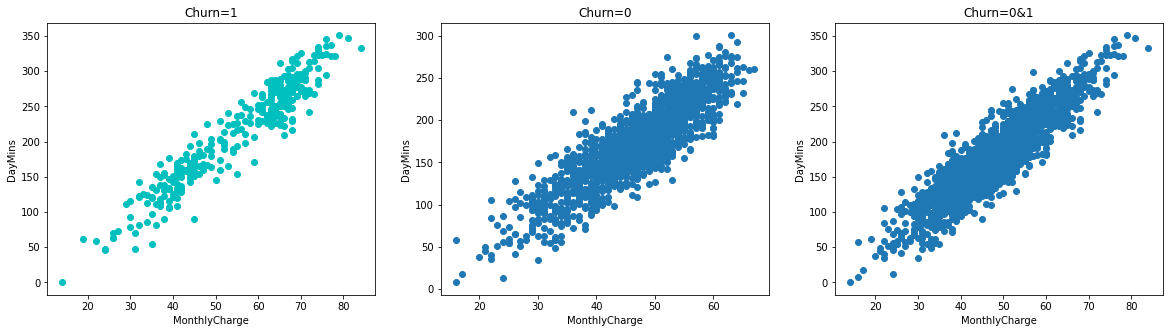

In [ ]:
dataus0 = seg1.loc[seg1["DataUsage"]==0] # Customers with Data Usage zero in seg1.

dataus00 = dataus0.loc[dataus0["Churn"]==0] # Existing Customers with Data Usage zero in seg1.
dataus01 = dataus0.loc[dataus0["Churn"]==1] # Churned Customers with Data Usage zero in seg1.

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(dataus01["MonthlyCharge"], dataus01["DayMins"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(dataus00["MonthlyCharge"], dataus00["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(dataus0["MonthlyCharge"], dataus0["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0&1")

In [ ]:
dataus0

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
2         0           137                1         0        0.0   
3         0            84                0         0        0.0   
4         0            75                0         0        0.0   
5         0           118                0         0        0.0   
7         0           147                0         0        0.0   
...     ...           ...              ...       ...        ...   
3322      1            62                1         0        0.0   
3324      0           159                1         0        0.0   
3327      0            79                1         0        0.0   
3330      0            28                1         0        0.0   
3331      0           184                0         0        0.0   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
5                 0    223.4        98           57.0       11.03       6.3  
7                 0    157.0        79           36.0        5.16       7.1  
...             ...      ...       ...            ...         ...       ...  
3322              4    321.1       105           78.0       13.28      11.5  
3324              1    169.8       114           46.0        9.89      11.6  
3327              2    134.7        98           40.0        9.49      11.8  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  

[1813 rows x 11 columns]

In [ ]:
# % churn in customers with zero data usage in seg1
dataus0['Churn'].value_counts(normalize=True) * 100

0    82.239382
1    17.760618
Name: Churn, dtype: float64

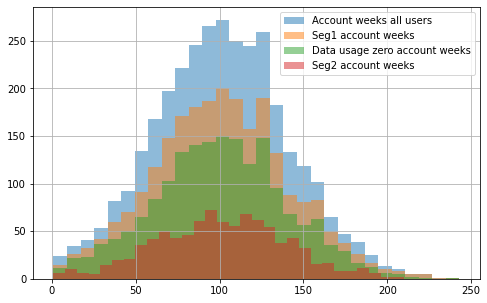

In [ ]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, alpha=0.5, label='Account weeks all users')
seg1["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg1 account weeks')
dataus0["AccountWeeks"].hist(bins=30, alpha=0.5, label='Data usage zero account weeks')
seg2["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg2 account weeks')
plt.legend()

### Data users within segemet 1

In [ ]:
dataus = seg1.loc[seg1["DataUsage"]>0]
dataus

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
8         0           117                1         0       0.19   
10        1            65                1         0       0.29   
11        0            74                1         0       0.34   
13        0            95                1         0       0.44   
20        0           147                1         0       0.31   
...     ...           ...              ...       ...        ...   
3320      1           122                0         0       0.30   
3323      1           117                1         0       0.39   
3325      0            78                1         0       0.23   
3326      0            96                1         0       0.36   
3329      0            68                1         0       0.34   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
8                 1    184.5        97           63.9       17.58       8.7  
10                4    129.1       137           44.9       11.43      12.7  
11                0    187.7       127           49.4        8.17       9.1  
13                3    156.6        88           52.4       12.38      12.3  
20                0    155.1       117           50.1       11.99      10.6  
...             ...      ...       ...            ...         ...       ...  
3320              4    140.0       101           44.0        9.82       9.7  
3323              5    118.4       126           45.9       12.47      13.6  
3325              2    193.4        99           45.3        5.85       9.3  
3326              1    106.6       128           46.6       14.24      14.9  
3329              3    231.1        57           56.4        7.67       9.6  

[607 rows x 11 columns]

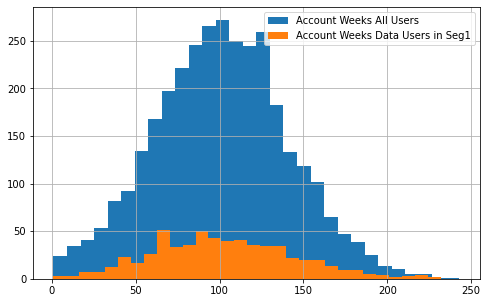

In [ ]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, label='Account Weeks All Users')
dataus["AccountWeeks"].hist(bins=30, label='Account Weeks Data Users in Seg1')
plt.legend()

In [ ]:
# % Churn in Custoemrs with data usege in seg1
dataus["Churn"].value_counts(normalize=True) * 100

0    86.655684
1    13.344316
Name: Churn, dtype: float64

### Segment 2. Customers who's data usage is >1.

In [ ]:
seg2

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
6         0           121                1         1       2.03   
9         0           141                0         1       3.02   
16        0            85                1         1       3.73   
...     ...           ...              ...       ...        ...   
3306      0           106                1         1       2.19   
3315      0           149                1         1       1.76   
3316      0           103                1         1       3.32   
3328      0           192                1         1       2.67   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
6                 3    218.2        88           87.3       17.43       7.5  
9                 0    258.6        84           93.2       11.10      11.2  
16                1    196.4       139           95.3       14.05      13.8  
...             ...      ...       ...            ...         ...       ...  
3306              1     83.6       131           53.9       10.20       8.1  
3315              0    148.5       106           52.6        5.73       6.5  
3316              0    164.1       111           80.2       10.96      12.3  
3328              2    156.2        77           71.7       10.78       9.9  
3332              0    234.4       113          100.0       13.30      13.7  

[913 rows x 11 columns]

In [ ]:
# % Churn in seg2.
seg2["Churn"].value_counts(normalize=True) * 100

0    91.237678
1     8.762322
Name: Churn, dtype: float64

In [ ]:
# Every custoemrs has data plan in seg2
seg2["DataPlan"].value_counts()

1    913
Name: DataPlan, dtype: int64

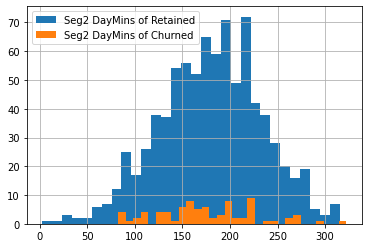

In [ ]:
seg20["DayMins"].hist(bins=30, label='Seg2 DayMins of Retained') 
seg21["DayMins"].hist(bins=30, label='Seg2 DayMins of Churned') 
plt.legend()

### Segment 2 Data Usage

Text(0.5, 1.0, 'Churn=0&1')

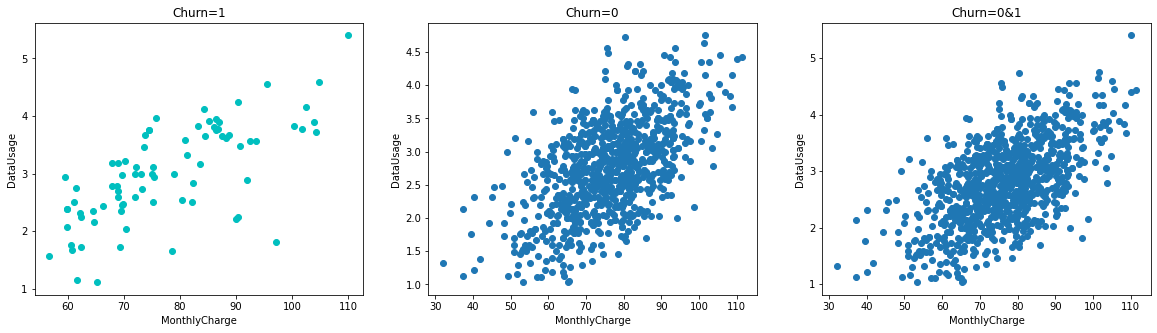

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg20["MonthlyCharge"], seg20["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

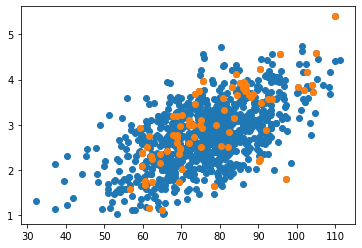

In [ ]:
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "o")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

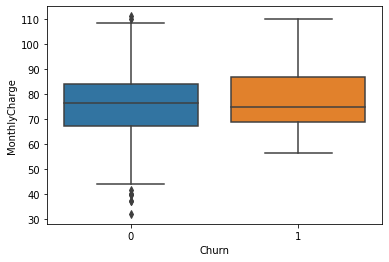

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

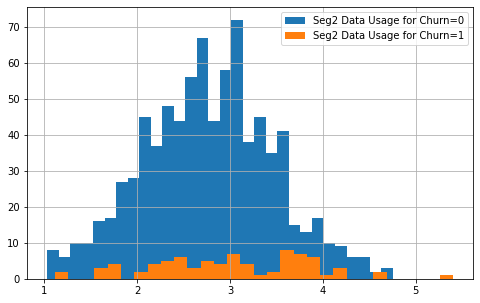

In [ ]:
plt.figure(figsize=(8,5))
seg20["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=0')
seg21["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=1') 
plt.legend()

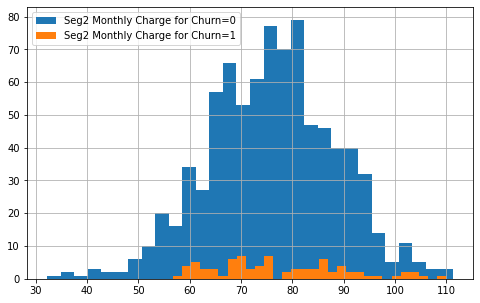

In [ ]:
plt.figure(figsize=(8,5))
seg20["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=0') 
seg21["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=1') 
plt.legend()

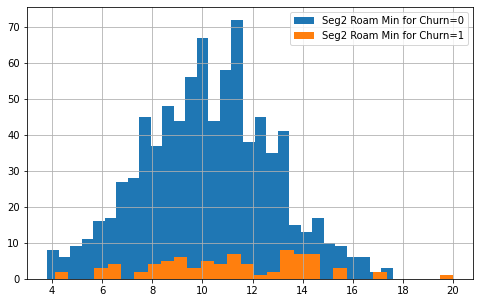

In [ ]:
plt.figure(figsize=(8,5))
seg20["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=0') 
seg21["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=1')
plt.legend() 

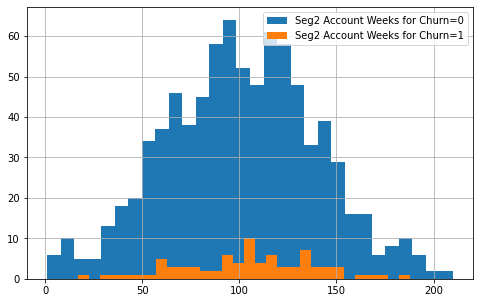

In [ ]:
plt.figure(figsize=(8,5))
seg20["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=0') 
seg21["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=1')
plt.legend() 

## Seg 1 & Seg2 DayMins

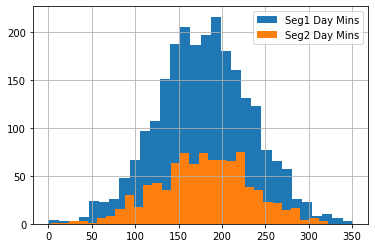

In [ ]:
seg1['DayMins'].hist(bins=30, label='Seg1 Day Mins')
seg2['DayMins'].hist(bins=30, label='Seg2 Day Mins')
plt.legend()

In [ ]:
seg1['DayMins'].mean()

179.7163223140496

In [ ]:
seg2['DayMins'].mean()

179.93088718510404

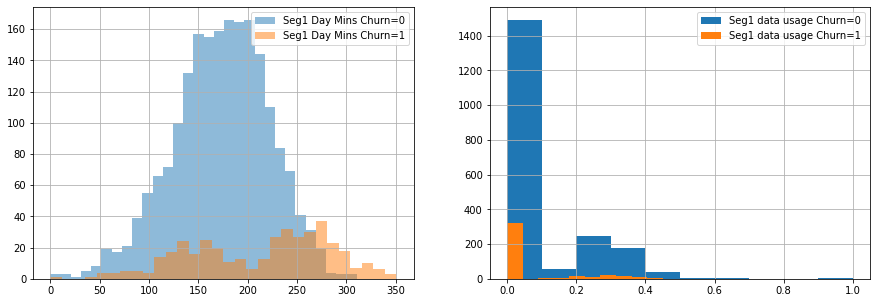

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg10["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=0')
seg11["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg10["DataUsage"].hist(label='Seg1 data usage Churn=0')
seg11["DataUsage"].hist(label='Seg1 data usage Churn=1')
plt.legend()

<AxesSubplot:xlabel='DataUsage', ylabel='Churn'>

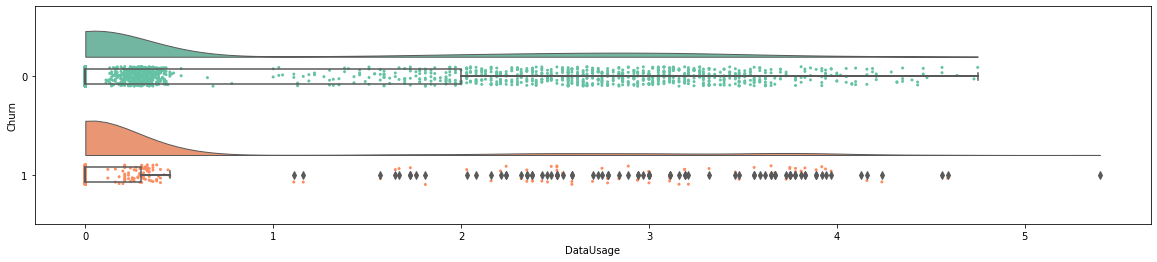

In [ ]:
plt.figure(figsize=(20,4))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

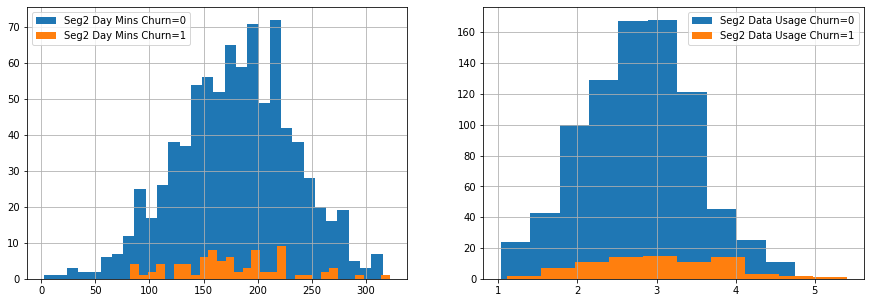

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg20["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=0')
seg21["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg20["DataUsage"].hist(label='Seg2 Data Usage Churn=0')
seg21["DataUsage"].hist(label='Seg2 Data Usage Churn=1')
plt.legend()

## Seg1 & Seg2 Monthly Charges

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Segment 2 Monthly charges'}>

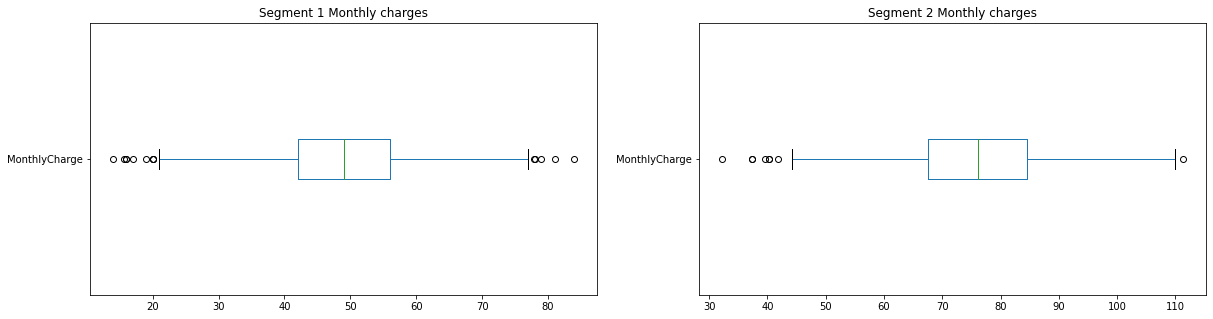

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
seg1["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 1 Monthly charges")
plt.subplot(122)
seg2["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 2 Monthly charges")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

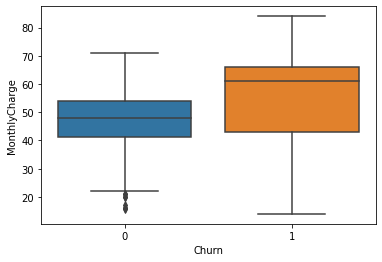

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg1)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

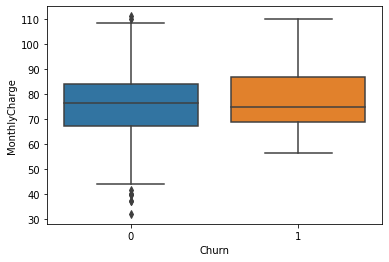

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

### SUM of Monthly Charges seg1 & 2

Sum of Monthly Charge in seg1 = 118104.1
Sum of Monthly Charge in seg2 = 69561.0


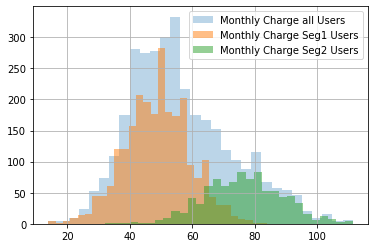

In [ ]:
df["MonthlyCharge"].hist(bins=30, alpha=0.3, label='Monthly Charge all Users') 
seg1["MonthlyCharge"].hist(bins=30, alpha=0.5, label='Monthly Charge Seg1 Users') 
seg2["MonthlyCharge"].hist(bins=30, alpha=0.5,label='Monthly Charge Seg2 Users') 
plt.legend()

print("Sum of Monthly Charge in seg1 =", seg1["MonthlyCharge"].sum())
print("Sum of Monthly Charge in seg2 =", seg2["MonthlyCharge"].sum())

## Roaming

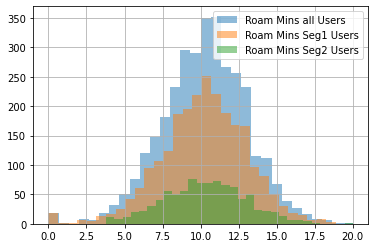

In [ ]:
df["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins all Users')
seg1["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg1 Users')
seg2["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg2 Users')
plt.legend()

20426.3 mins, per 2017 customers who not churned.
4276.5 mins, per 403 customers who churned.


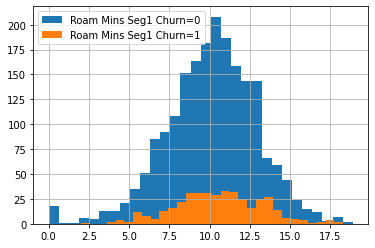

In [ ]:
seg10["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=0')
seg11["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=1') 
plt.legend()

print(f"{seg10.RoamMins.sum()} mins, per {len(seg10.RoamMins)} customers who not churned.")
print(f"{seg11.RoamMins.sum()} mins, per {len(seg11.RoamMins)} customers who churned.")

8526.5 mins, per 833 customers who not churned.
891.6000000000001 mins, per 80 customers who churned.


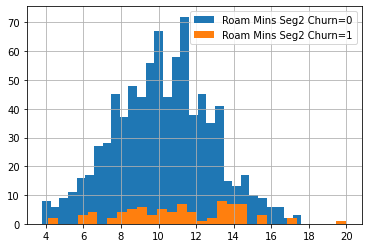

In [ ]:
seg20["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=0')
seg21["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=1')
plt.legend()

print(f"{seg20.RoamMins.sum()} mins, per {len(seg20.RoamMins)} customers who not churned.")
print(f"{seg21.RoamMins.sum()} mins, per {len(seg21.RoamMins)} customers who churned.")

## Customer Service Calls

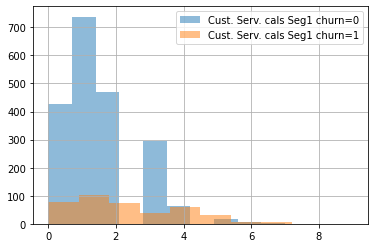

In [ ]:
seg10["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=0')
seg11["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=1')
plt.legend()

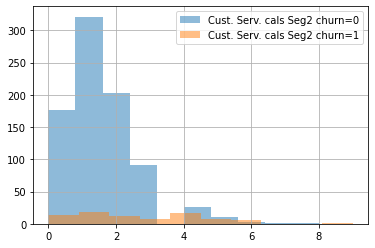

In [ ]:
seg20["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=0')
seg21["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=1')
plt.legend()

## Contract Renewal

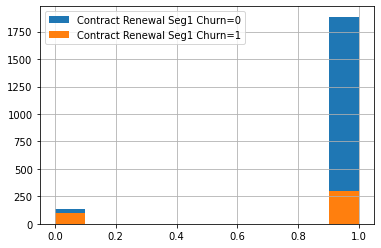

In [ ]:
seg10["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=0') 
seg11["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=1')
plt.legend() 

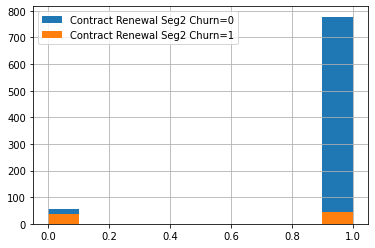

In [ ]:
seg20["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=0')
seg21["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=1')
plt.legend()

## Steps to Retain Customers
* More Customer Service calls mean the customer is more prone to churn.
* Optimise price of talk time for segment 1 customers.
* Introduce data plan to those customers who are using data without data plans ASAP.
* Introduce exciting data plans to segment 1 customers.
* If possible optimising price of data plans can retain segment 2 customers also.

# Hypothesis Test

**Null Hypothesis:** Which customers are using data without subscribing to data plan are more prone to churn.

**Alternate Hypothesis:** Which customers are using data without subscribing to data plan are not prone to churn.


**Permutations** 
* In this test random sample of 20 customers will be taken.
* That 20 customers will be in two groups.
* Group2: Customers which are using data without subscribing data plan.
* Group1: All remaining Customers which are not in Group2.
* Find the churn ratio in both groups.


In [ ]:
# 1000 Permutations
# churn in only customers using data without dataplan 

population_churn = []   # Remaining customers (not in Group2) churn % in sample (Group 1)
no_data_plan_churn = []   # Churn % in data users, without data plan (Group 2)

for i in range(0,1000):
  sample = df.sample(n=20)
  sample_churn = sample.loc[~(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  sample_churn_data_plan = sample.loc[(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  population_churn.append(sample_churn)
  no_data_plan_churn.append(sample_churn_data_plan)

In [ ]:
population_churn = pd.DataFrame(population_churn)
no_data_plan_churn = pd.DataFrame(no_data_plan_churn)

The means of samples are significanly diffrent


In [ ]:
population_churn[1].mean()

0.2241190866190866

In [ ]:
no_data_plan_churn[1].mean()

0.33219023927979147

Distplot shows lower density than next plot means a null hypothesis is going right.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

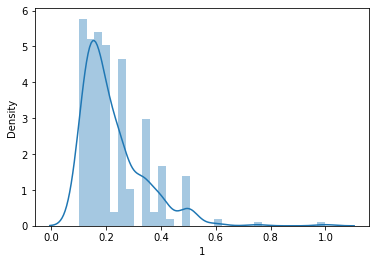

In [ ]:
sns.distplot(population_churn[1])

Distplot shows higher density than the previous plot means a null hypothesis is going right.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

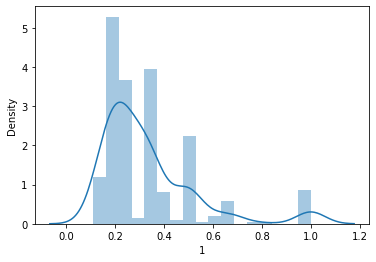

In [ ]:
sns.distplot(no_data_plan_churn[1])

In [ ]:
permutation_results = pd.concat([population_churn, no_data_plan_churn], axis=1, ignore_index=True)
permutation_results.reset_index(drop=True, inplace=True)

In [ ]:
dff = permutation_results
dff.fillna(0, inplace=True)
dff['Result'] = dff[3] - dff[1]
dff

0         1    2    3    Result
0    0.777778  0.222222  1.0  0.0 -0.222222
1    1.000000  0.000000  1.0  0.0  0.000000
2    1.000000  0.000000  1.0  0.0  0.000000
3    1.000000  0.000000  0.0  1.0  1.000000
4    1.000000  0.000000  1.0  0.0  0.000000
..        ...       ...  ...  ...       ...
995  1.000000  0.000000  1.0  0.0  0.000000
996  1.000000  0.000000  1.0  0.0  0.000000
997  0.750000  0.250000  0.5  0.5  0.250000
998  1.000000  0.000000  1.0  0.0  0.000000
999  1.000000  0.000000  1.0  0.0  0.000000

[1000 rows x 5 columns]

In [ ]:
len(dff.loc[dff['Result']>=0]) * 100 / len(dff)

73.9

In [ ]:
len(dff.loc[dff['Result']<0]) * 100 / len(dff)

26.1

* ~70% of experiments are in favor of the null hypothesis.
* Null hypothesis accepted.
* All conclusions on customer analysis are going right.

# Machine Learning Model

## Random Under-Sampling

In [ ]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
# Random under-sampleing
df2 = df.loc[df['Churn']==0].sample(n=483).copy()
# All samples of fraud transactions
df3 = df.loc[df['Churn']==1].copy()

# Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle raws randomly
df4 = df4.sample(frac=1)

# Reset index of every raws
df4.reset_index(drop=True, inplace=True)
df4

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0        1            49                1         0       0.00              2   
1        0            62                1         0       0.00              1   
2        0           158                1         0       0.31              0   
3        0           111                1         0       0.33              0   
4        0            59                0         1       2.46              1   
..     ...           ...              ...       ...        ...            ...   
961      0            99                1         0       0.00              1   
962      0            85                0         0       0.00              2   
963      0            86                1         0       0.00              0   
964      1            65                1         0       0.00              4   
965      0           164                1         0       0.00              1   

     DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0      266.3        90           63.0       10.39      14.0  
1      281.0        66           62.0        8.03       0.0  
2      220.9       129           62.1       12.11       6.4  
3      181.8       117           48.3        7.91       9.7  
4      225.0        78           79.6        9.57       9.1  
..       ...       ...            ...         ...       ...  
961    124.6        90           34.0        7.32      10.5  
962    216.0        73           53.0        9.41       3.6  
963     83.5        96           33.0       11.06      12.6  
964    245.7       139           63.0       12.10       4.2  
965    123.3        78           36.0        8.50      12.7  

[966 rows x 11 columns]

## EDA

In [ ]:
df4

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0        1            49                1         0       0.00              2   
1        0            62                1         0       0.00              1   
2        0           158                1         0       0.31              0   
3        0           111                1         0       0.33              0   
4        0            59                0         1       2.46              1   
..     ...           ...              ...       ...        ...            ...   
961      0            99                1         0       0.00              1   
962      0            85                0         0       0.00              2   
963      0            86                1         0       0.00              0   
964      1            65                1         0       0.00              4   
965      0           164                1         0       0.00              1   

     DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0      266.3        90           63.0       10.39      14.0  
1      281.0        66           62.0        8.03       0.0  
2      220.9       129           62.1       12.11       6.4  
3      181.8       117           48.3        7.91       9.7  
4      225.0        78           79.6        9.57       9.1  
..       ...       ...            ...         ...       ...  
961    124.6        90           34.0        7.32      10.5  
962    216.0        73           53.0        9.41       3.6  
963     83.5        96           33.0       11.06      12.6  
964    245.7       139           63.0       12.10       4.2  
965    123.3        78           36.0        8.50      12.7  

[966 rows x 11 columns]

<AxesSubplot:>

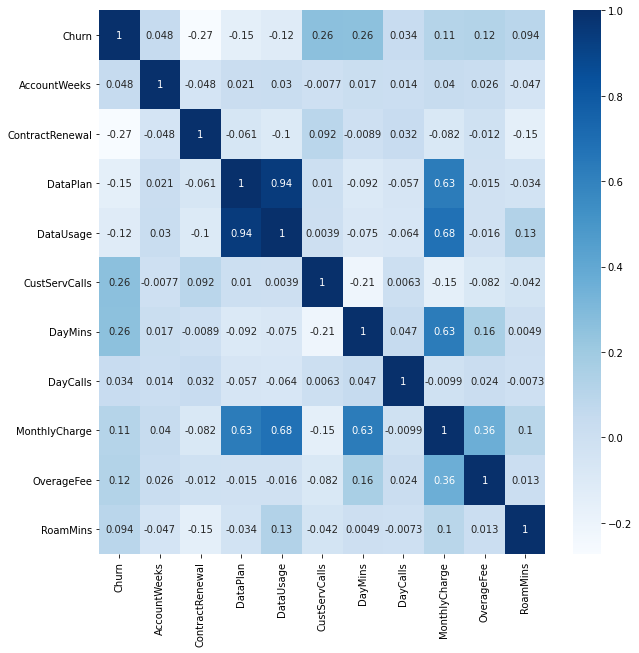

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True, cmap='Blues')

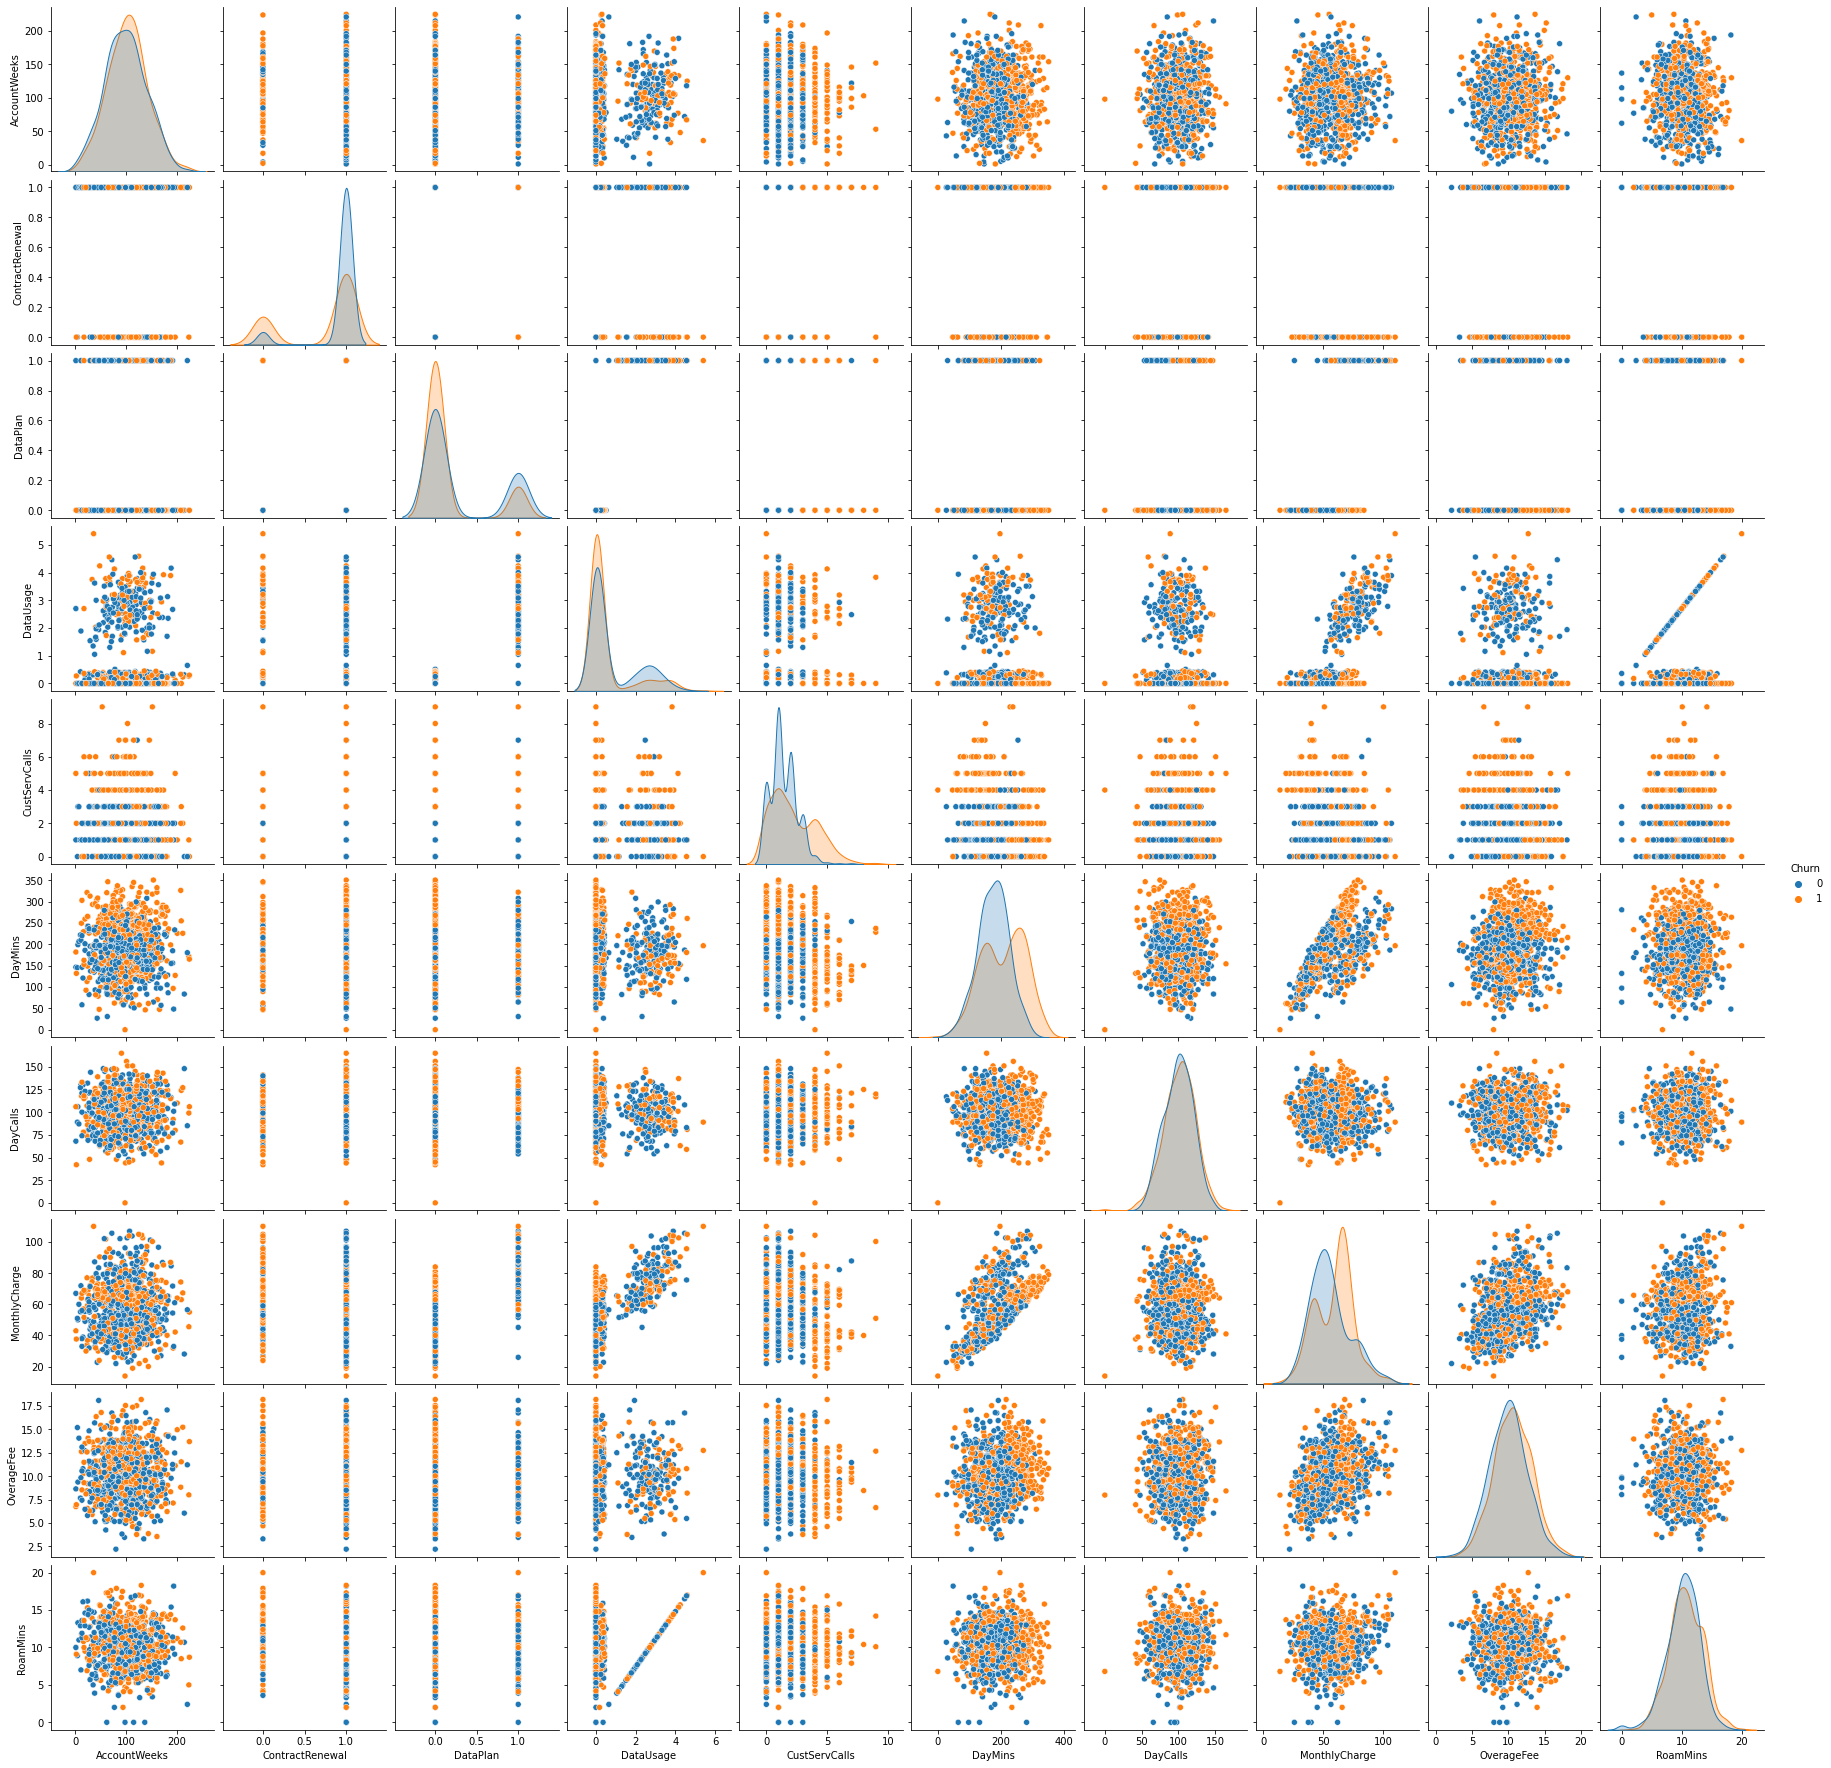

In [ ]:
sns.pairplot(df4, hue='Churn')

<AxesSubplot:xlabel='DataUsage', ylabel='Churn'>

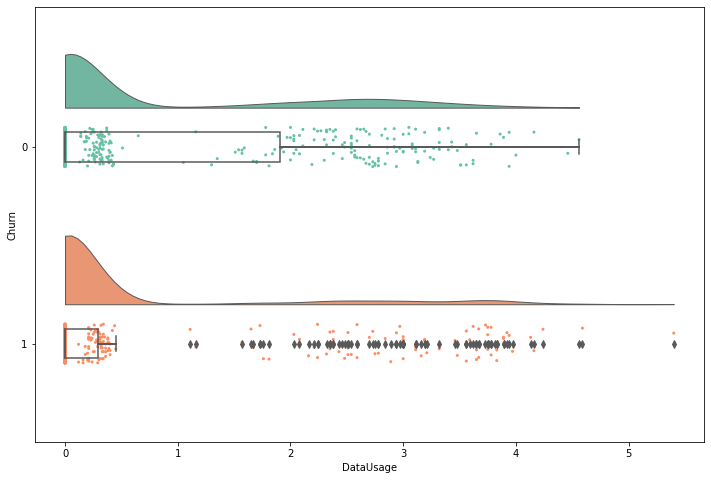

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'DataUsage', orient = 'h')

<AxesSubplot:xlabel='DayMins', ylabel='Churn'>

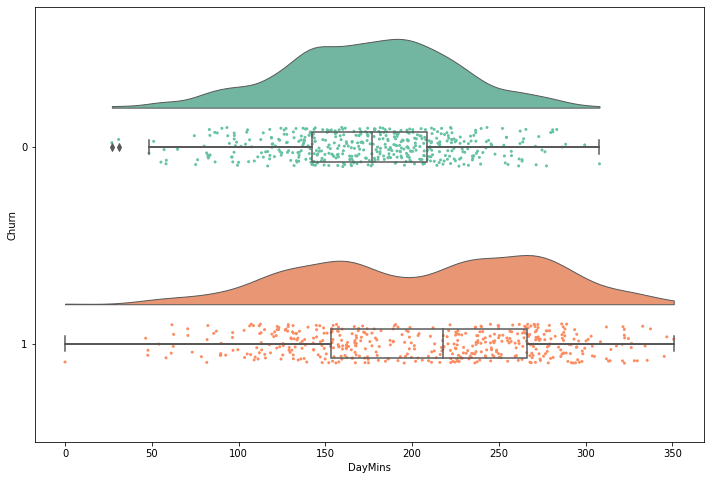

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'DayMins', orient = 'h')

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Churn'>

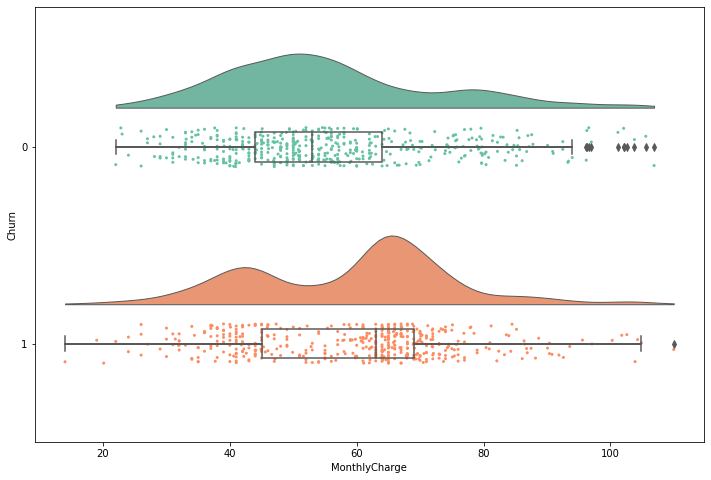

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'MonthlyCharge', orient = 'h')

<AxesSubplot:xlabel='CustServCalls', ylabel='Churn'>

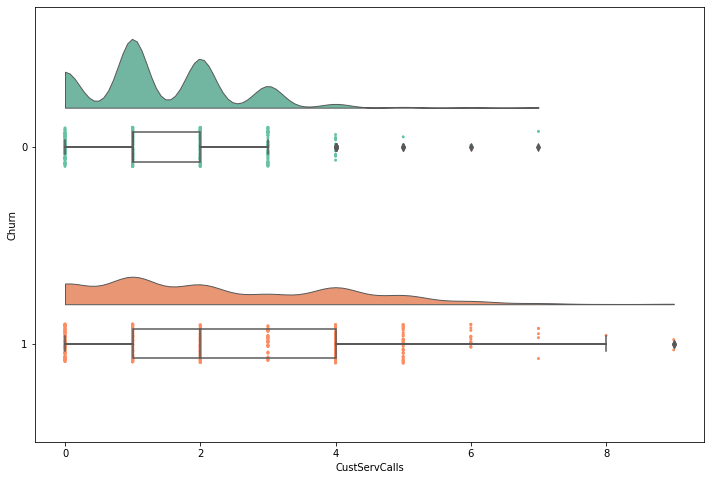

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'CustServCalls', orient = 'h')

<AxesSubplot:xlabel='AccountWeeks', ylabel='Churn'>

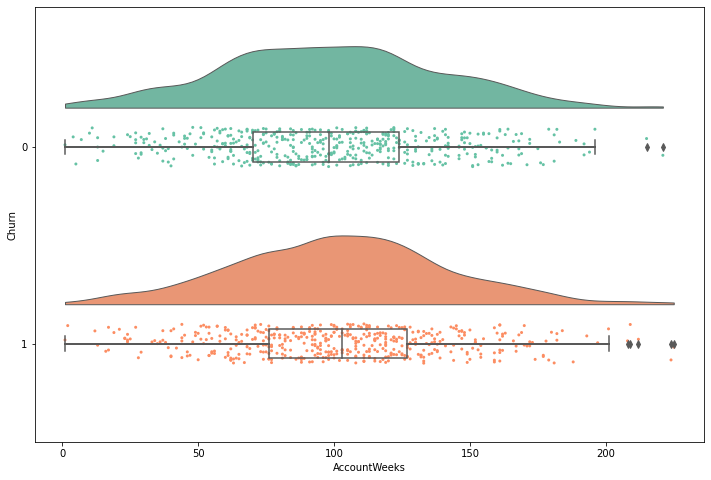

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'AccountWeeks', orient = 'h')

<AxesSubplot:xlabel='DataPlan', ylabel='Churn'>

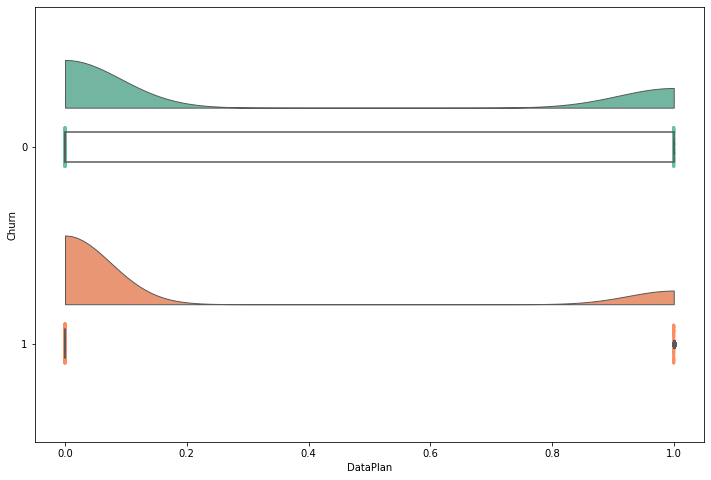

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'DataPlan', orient = 'h')

<AxesSubplot:xlabel='OverageFee', ylabel='Churn'>

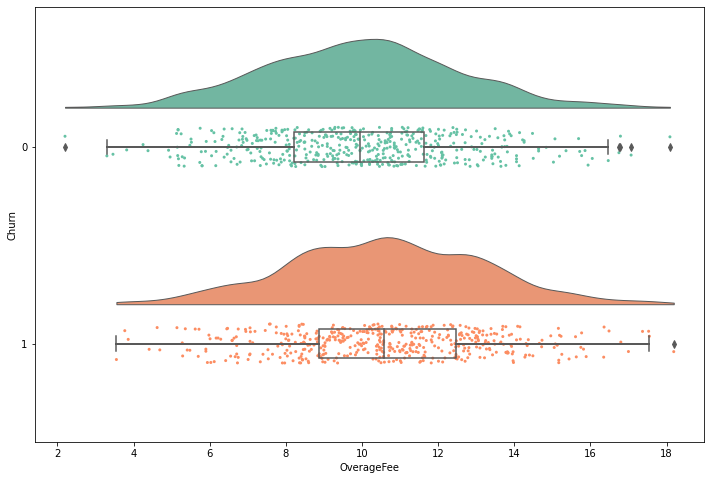

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'OverageFee', orient = 'h')

In [ ]:
df4.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [ ]:
X = df4.drop("Churn", axis=1)
y = df4["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.66960623,  0.46984542, -0.55652188, ...,  0.25235993,
        -0.1422979 , -1.46920084],
       [-0.82077875,  0.46984542, -0.55652188, ...,  0.43365781,
         0.92294348, -0.61266107],
       [ 1.11926853,  0.46984542, -0.55652188, ...,  0.55452307,
         1.53986384, -0.57542021],
       ...,
       [-0.64441081,  0.46984542, -0.55652188, ..., -1.01672526,
         1.01490676,  1.02593676],
       [ 1.54759066,  0.46984542, -0.55652188, ..., -1.07715789,
        -1.75548719, -1.5064417 ],
       [ 1.54759066,  0.46984542, -0.55652188, ..., -0.41239898,
         0.33667754,  0.39284215]])

In [ ]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.17060722,  0.46144096,  1.92124347, ...,  0.77849612,
        -0.65692205, -0.21556167],
       [-0.07643637,  0.46144096,  1.92124347, ..., -1.88521955,
        -0.57083711, -3.52120049],
       [ 0.5411726 ,  0.46144096, -0.52049624, ...,  0.28797505,
         0.40740084, -0.697634  ],
       ...,
       [ 0.17060722, -2.16712449, -0.52049624, ..., -0.90417742,
         0.11784241,  1.23065531],
       [ 1.85050362,  0.46144096, -0.52049624, ...,  0.03960995,
         0.17653669, -0.04339299],
       [-1.73162841,  0.46144096, -0.52049624, ..., -0.64339407,
        -0.03084976, -0.697634  ]])

## Decision Tree 

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       171
           1       0.78      0.86      0.82       148

    accuracy                           0.82       319
   macro avg       0.83      0.83      0.82       319
weighted avg       0.83      0.82      0.82       319



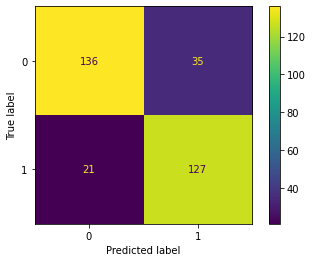

In [ ]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

pd = clfd.predict(X_test)
print(classification_report(y_test, pd))
plot_confusion_matrix(clfd, X_test, y_test) 

## Random Forest

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       171
           1       0.81      0.89      0.85       148

    accuracy                           0.85       319
   macro avg       0.85      0.85      0.85       319
weighted avg       0.86      0.85      0.85       319



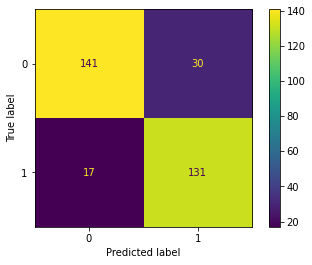

In [ ]:
clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(X_train, y_train)

pr = clfr.predict(X_test)
print(classification_report(y_test, pr))
plot_confusion_matrix(clfr, X_test, y_test)  

## Gradient Boosting

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       171
           1       0.82      0.86      0.84       148

    accuracy                           0.85       319
   macro avg       0.85      0.85      0.85       319
weighted avg       0.85      0.85      0.85       319



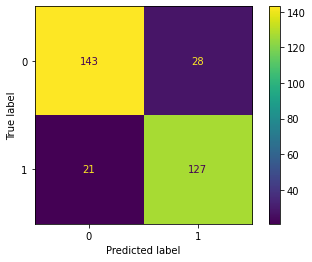

In [ ]:
clfg = GradientBoostingClassifier(n_estimators=200, max_depth=2, random_state=0)
clfg.fit(X_train, y_train)

pg = clfg.predict(X_test)
print(classification_report(y_test, pg))
plot_confusion_matrix(clfg, X_test, y_test) 

## KNN

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       171
           1       0.80      0.84      0.82       148

    accuracy                           0.83       319
   macro avg       0.83      0.83      0.83       319
weighted avg       0.83      0.83      0.83       319



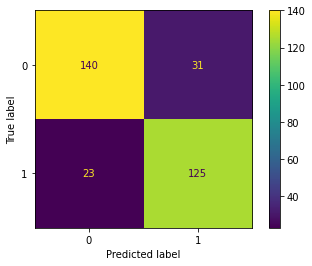

In [ ]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
print(classification_report(y_test, pk))
plot_confusion_matrix(clfk, X_test, y_test) 

## AUC ROC

In [ ]:
p1 = clfd.predict_proba(X_test)
p2 = clfr.predict_proba(X_test)
p3 = clfg.predict_proba(X_test)
p4 = clfk.predict_proba(X_test)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8933341235972814 0.9016911648490598 0.8941046309467363 0.8612691639007429


In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

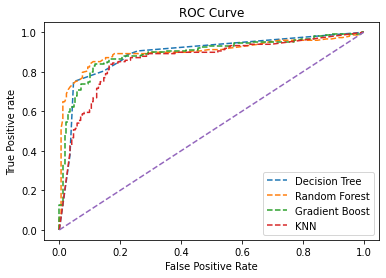

In [ ]:
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Conclusion
## Steps to Retain Customers
* More Customer Service calls mean the customer is more prone to churn.
* Optimize the price of talk time for segment 1 customers.
* Introduce a data plan to those customers who are using data without data plans ASAP.
* Introduce exciting data plans to segment 1 customers.
* If the possible optimizing price of data plans can retain segment 2 customers also.


## Machine Learning Models
* Random Forest, Gradientboost are best.
* Gradientboost, decision tree, KNN are hyperparameter tuned. Random forest is not hyperparameter tuned.
---